# 과제5

제 5장의 wine data를 이용하여 linear, quadratic 그리고 naive Bayesian 을 적용하여 그 결과를 비교하고 해석하라.
> - **특성변수가 output에 미치는 영향을 추정된 모수로 해석할 수 있어야 합니다.** 머신러닝은 black-box가 아닙니다.
> - 모형의 정밀도와 손실값을 최소로 하는 궁극적인 목표는 **특성변수의 계수를 추정하여 output에 대한 영향을 해석하고 설명**하는 것입니다. 
> - 단순하게 프로그램 결과만 나열하는 하는 것은 해석이 아닙니다.   
**왜 그런지 고민해 보고 원인을 설명해야 합니다.** 

In [72]:
# wine data load
import pandas as pd
import numpy as np
data=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                     'wine/wine.data',header=None)
data.columns = ['class label', 'alchohol', 'malic acid', 'ash', 
                    'alcalinity of ash', 'magnesium', 'total phenols', 
                    'flavanoids', 'nonflavanoid phenols', 
                    'proanthocyanins', 'color intensity', 'hue', 
                    'OD208', 'proline']  # Column names
print('class label:', np.unique(data['class label']))  # Class 출력
data.head()

class label: [1 2 3]


,class label,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [73]:
data.columns

Index(['class label', 'alchohol', 'malic acid', 'ash', 'alcalinity of ash',
       'magnesium', 'total phenols', 'flavanoids', 'nonflavanoid phenols',
       'proanthocyanins', 'color intensity', 'hue', 'OD208', 'proline'],
      dtype='object')

In [74]:
data.shape

(178, 14)

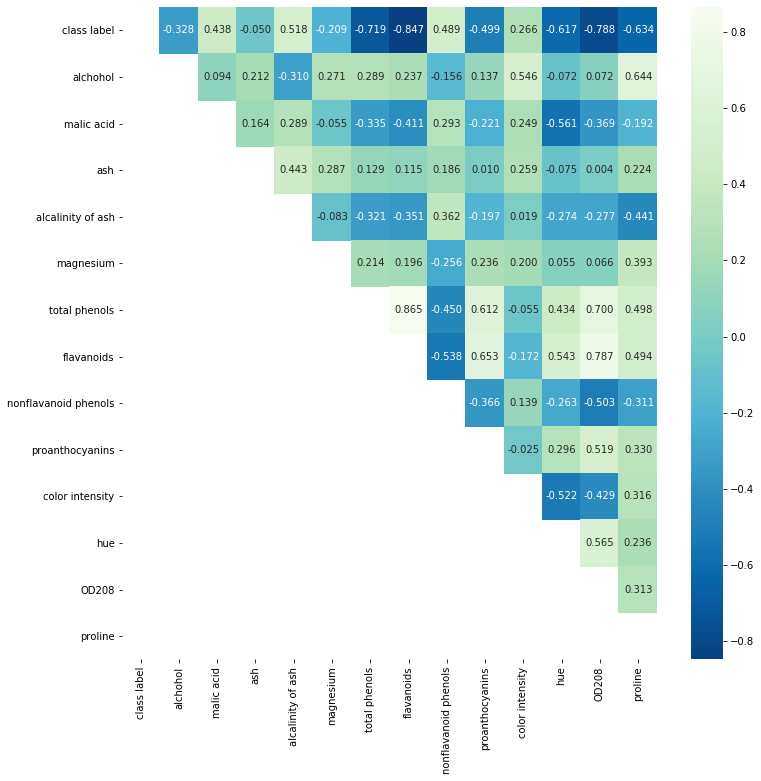

In [75]:
import matplotlib as plt
import matplotlib.pyplot as plt 
import seaborn as sns

corr_mat = data.corr()
mask=np.zeros_like(corr_mat,dtype=np.bool)
mask[np.tril_indices_from(mask)]=True

plt.figure(figsize=(12,12))
sns.heatmap(corr_mat,annot=True,cmap='GnBu_r',mask=mask,fmt='.3f')
plt.show()

피쳐들끼리 독립이라고 보기 힘듦...??...??? 이걸 상관계수로 볼 수 있나

2    71
1    59
3    48
Name: class label, dtype: int64


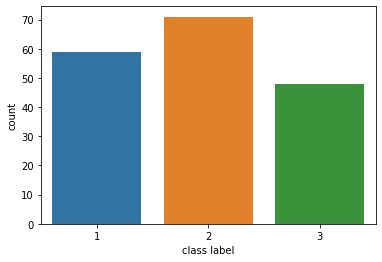

In [76]:
sns.countplot(data=data, x='class label')
print(data['class label'].value_counts())

In [77]:
data.describe()

,class label,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [78]:
# split
data.dropna(inplace=True)
from sklearn.model_selection import train_test_split
X = data.drop(['class label'], axis=1)
y = data['class label']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(124, 13) (54, 13) (124,) (54,)


In [79]:
# 표준화
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_val_std = std.transform(X_val)

In [80]:
display(X_train.head(3))
display(X_val.head(3))

,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480
118,12.77,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.4,0.70,2.12,372
155,13.17,5.19,2.32,22.0,93,1.74,0.63,0.61,1.55,7.9,0.60,1.48,725


,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
142,13.52,3.17,2.72,23.5,97,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520
152,13.11,1.90,2.75,25.5,116,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660


# 1. LDA
- 각 집단은 동일한 분산을 갖는다고 가정
- 각 집단은 정규분포를 따름

In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
cld=LinearDiscriminantAnalysis(solver = 'svd', store_covariance=True) 
cld.fit(X_train, y_train)
y_train_pred=cld.predict(X_train)
y_val_pred=cld.predict(X_val)

In [83]:
# LDA
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
print(accuracy_score(y_train, y_train_pred)) 
print(accuracy_score(y_val, y_val_pred))
print(confusion_matrix(y_val, y_val_pred)) 

1.0
0.9814814814814815
[[18  0  0]
 [ 0 20  1]
 [ 0  0 15]]


In [84]:
y_val_pred

array([3, 3, 3, 2, 2, 1, 2, 1, 2, 3, 3, 1, 2, 1, 3, 2, 1, 1, 1, 3, 1, 2,
       2, 1, 2, 3, 3, 2, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 2, 3, 1, 3, 1, 1,
       1, 2, 1, 3, 2, 1, 2, 1, 1, 3], dtype=int64)

In [85]:
# 96번 데이터만 오분류(2인데 3로 오분류)
X_val.loc[X_val.index==96]

,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
96,11.81,2.12,2.74,21.5,134,1.6,0.99,0.14,1.56,2.5,0.95,2.26,625


In [86]:
data

,class label,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [87]:
data.query('index==96')

,class label,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
96,2,11.81,2.12,2.74,21.5,134,1.6,0.99,0.14,1.56,2.5,0.95,2.26,625


In [88]:
cld.predict_proba(X_val.loc[X_val.index==96])

array([[1.83752633e-07, 3.12286099e-01, 6.87713717e-01]])

In [89]:
data.groupby(['class label'])['flavanoids'].mean()

class label
1    2.982373
2    2.080845
3    0.781458
Name: flavanoids, dtype: float64

2인데 3으로 분류함. 얘만 잘못분류함. 

In [90]:
print('<클래스별 평균 추정치>') # 같음
print(cld.means_)
print('-'*70)
# print(cld.xbar_) # svd인 경우만 존재
print('<클래스별 분산 추정치>')
cov = cld.covariance_
print(cov)
print('-'*70)
print('<클래스별 판별식의 bias(intercept)>')
print(cld.intercept_)
print('-'*70)
print('<클래스별 판별식의 계수 추정치>')
print(cld.coef_)

<클래스별 평균 추정치>
[[1.36785366e+01 2.02317073e+00 2.45439024e+00 1.71365854e+01
  1.05341463e+02 2.86219512e+00 3.02731707e+00 2.89268293e-01
  1.95634146e+00 5.52000000e+00 1.06878049e+00 3.15609756e+00
  1.11382927e+03]
 [1.22118000e+01 2.02160000e+00 2.27140000e+00 2.06780000e+01
  9.34000000e+01 2.21060000e+00 2.04080000e+00 3.84000000e-01
  1.58700000e+00 3.04620000e+00 1.04052000e+00 2.77820000e+00
  4.94980000e+02]
 [1.31745455e+01 3.56666667e+00 2.42181818e+00 2.13181818e+01
  1.00212121e+02 1.68151515e+00 7.77878788e-01 4.48787879e-01
  1.17727273e+00 7.49424242e+00 6.86363636e-01 1.68090909e+00
  6.49090909e+02]]
----------------------------------------------------------------------
<클래스별 분산 추정치>
[[ 2.41615068e-01  3.84592439e-02 -5.24867188e-03 -2.30283993e-03
  -7.86881482e-02  1.11713745e-02  1.33361710e-02 -4.67113583e-04
   1.07053192e-02  1.77454884e-01  4.91173257e-04 -1.62968428e-02
   8.54595097e+00]
 [ 3.84592439e-02  8.32381396e-01  2.83227199e-02  4.00338741e-01
  -5.

In [91]:
data.columns

Index(['class label', 'alchohol', 'malic acid', 'ash', 'alcalinity of ash',
       'magnesium', 'total phenols', 'flavanoids', 'nonflavanoid phenols',
       'proanthocyanins', 'color intensity', 'hue', 'OD208', 'proline'],
      dtype='object')

In [92]:
cov.shape

(13, 13)

# 2. QDA
- 범주별 공분산의 구조가 확연히 다를 때

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
cqd=QuadraticDiscriminantAnalysis(store_covariance=True)

cqd.fit(X_train, y_train)
y_train_pred=cqd.predict(X_train)
y_val_pred=cqd.predict(X_val)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_val, y_val_pred)) 
print(confusion_matrix(y_val, y_val_pred)) 

In [ ]:
y_val_pred

In [ ]:
data.query('index==136|index==81')

In [ ]:
# 3인데 2로 분류
display(X_val.loc[X_val.index==136])
print(cqd.predict_proba(X_val.loc[X_val.index==136]) )

In [ ]:
# 2인데 1로 분류
display(X_val.loc[X_val.index==81])
print(cqd.predict_proba(X_val.loc[X_val.index==81]) )

2인데 1로 분류된 것, 3인데 2로 분류된 것 두개 존재

In [ ]:
print('<클래스별 평균 추정치>')
print(cqd.means_)
print('-'*70)
# print(cqd.xbar_) # svd인 경우만 존재
print('<클래스별 분산 추정치>')
print(cqd.covariance_) # 범주별 공분산이 다르다고 가정함. 
print('-'*70)
print('< array_like >')
print(cqd.priors_)
print('-'*70)
print('< rotation >')
print(cqd.rotations_)

In [ ]:
a = cqd.covariance_

In [ ]:
len(a)

In [ ]:
a_array = np.array(a)

In [ ]:
a_array.shape # 각 범주별 공분산

In [ ]:
a_array[0]

In [ ]:
cov

# 3. Baysian Model
- 모든 변수들을 서로 조건부 독립이라고 가정함
## 1) Gaussian Naive Bayes

In [93]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
g_train_pred = gnb.predict(X_train)
g_val_pred = gnb.predict(X_val)

print(accuracy_score(y_train, g_train_pred))
print(accuracy_score(y_val, g_val_pred)) 
print(confusion_matrix(y_val, g_val_pred)) 

0.9919354838709677
0.9814814814814815
[[17  1  0]
 [ 0 21  0]
 [ 0  0 15]]


In [94]:
# 1인데 2로 분류
display(data.query('index==25'))
print(gnb.predict_proba(X_val.loc[X_val.index==25]) )

,class label,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
25,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.2,830


[[2.66728538e-02 9.73327146e-01 4.27853938e-24]]


In [97]:
data.groupby(['class label']).mean()

,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD208,proline
class label,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


In [95]:
gnb.sigma_ # 각 범주별 공분산

array([[1.83899659e-01, 4.28303942e-01, 4.70483797e-02, 5.85120234e+00,
        9.23713094e+01, 1.23338445e-01, 1.67672651e-01, 5.62077705e-03,
        1.86856708e-01, 1.70165302e+00, 1.38539716e-02, 1.13593888e-01,
        5.08760441e+04],
       [2.90028560e-01, 9.27111240e-01, 1.08893840e-01, 1.25406178e+01,
        2.01560102e+02, 2.97419440e-01, 5.15645160e-01, 1.56738003e-02,
        3.13086800e-01, 8.92065360e-01, 4.36086499e-02, 2.82256560e-01,
        2.09297797e+04],
       [2.40350836e-01, 1.19126948e+00, 3.26015248e-02, 5.43674092e+00,
        1.36470258e+02, 9.54843531e-02, 8.48882098e-02, 1.68821492e-02,
        1.20303453e-01, 4.76924744e+00, 1.35249407e-02, 6.60615799e-02,
        1.47491737e+04]])

In [96]:
cov

array([[ 2.41615068e-01,  3.84592439e-02, -5.24867188e-03,
        -2.30283993e-03, -7.86881482e-02,  1.11713745e-02,
         1.33361710e-02, -4.67113583e-04,  1.07053192e-02,
         1.77454884e-01,  4.91173257e-04, -1.62968428e-02,
         8.54595097e+00],
       [ 3.84592439e-02,  8.32381396e-01,  2.83227199e-02,
         4.00338741e-01, -5.87202072e-01, -9.42715080e-03,
        -9.52135930e-03,  7.35759507e-03,  4.69856098e-02,
        -1.45330075e-01, -4.62261537e-02,  5.60318655e-02,
        -2.84926307e+01],
       [-5.24867188e-03,  2.83227199e-02,  6.80395376e-02,
         4.91619869e-01,  5.99821043e-01,  2.86110643e-02,
         5.76375339e-02,  7.22680996e-03,  4.46800139e-03,
         5.20767053e-02,  3.63662334e-03,  2.06618862e-02,
        -5.77687326e-02],
       [-2.30283993e-03,  4.00338741e-01,  4.91619869e-01,
         8.43814527e+00,  4.38952042e+00,  1.97406921e-01,
         4.41501428e-01,  4.11469745e-02,  1.66482453e-01,
         5.67441496e-02,  9.41799084e

## 2) Multinomial Naive Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()
gnb.fit(X_train, y_train)
g_train_pred = gnb.predict(X_train)
g_val_pred = gnb.predict(X_val)

print(accuracy_score(y_train, g_train_pred))
print(accuracy_score(y_val, g_val_pred)) 
print('-'*60)
print(confusion_matrix(y_train, g_train_pred)) 
print(confusion_matrix(y_val, g_val_pred)) 

0.8467741935483871
0.7407407407407407
------------------------------------------------------------
[[37  1  3]
 [ 1 41  8]
 [ 1  5 27]]
[[15  0  3]
 [ 2 13  6]
 [ 0  3 12]]
